In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler


In [4]:
#Importing dataset
url = 'https://raw.githubusercontent.com/rajmaniyoor/BikesharingAssignment/refs/heads/main/BikeSharing.csv'  # Replace with your GitHub raw file URL
df = pd.read_csv(url)


In [5]:
#check data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#check the dimensions
df.shape

(730, 16)

In [ ]:
#check the columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#describe the dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#check if any null values exist
df.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
#check if any duplicate values exist
df.duplicated().sum()


0

In [ ]:
#drop the columns 'instant' (as its just an index), 'dteday' (as we have year and month columns seperatly), 'casual', 'registered' (cnt is casual+registerd)
#df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
df1=df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
df1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
#season is not an contineous variable and mapping the labels associated with them

season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df1.loc[:, 'season'] = df1['season'].map(season_mapping)

#weekday is not an contineous variable and mapping the labels associated with them
weekday_mapping = {1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}
df1.loc[:,'weekday'] = df1['weekday'].map(weekday_mapping)

#mnth is not an contineous variable and mapping the labels associated with them
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                  7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df1.loc[:,'mnth'] = df1['mnth'].map(month_mapping)

#weathersit is not an contineous variable and mapping the labels associated with them
weathersit_mapping = {
    1: 'Clear, Few clouds',
    2: 'Mist + Cloudy',
    3: 'Light Snow, Light Rain',
    4: 'Heavy Rain'
}

df1.loc[:,'weathersit'] = df1['weathersit'].map(weathersit_mapping)

In [ ]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,"Clear, Few clouds",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,"Clear, Few clouds",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,"Clear, Few clouds",9.305237,11.46350,43.6957,12.522300,1600


## Visualising

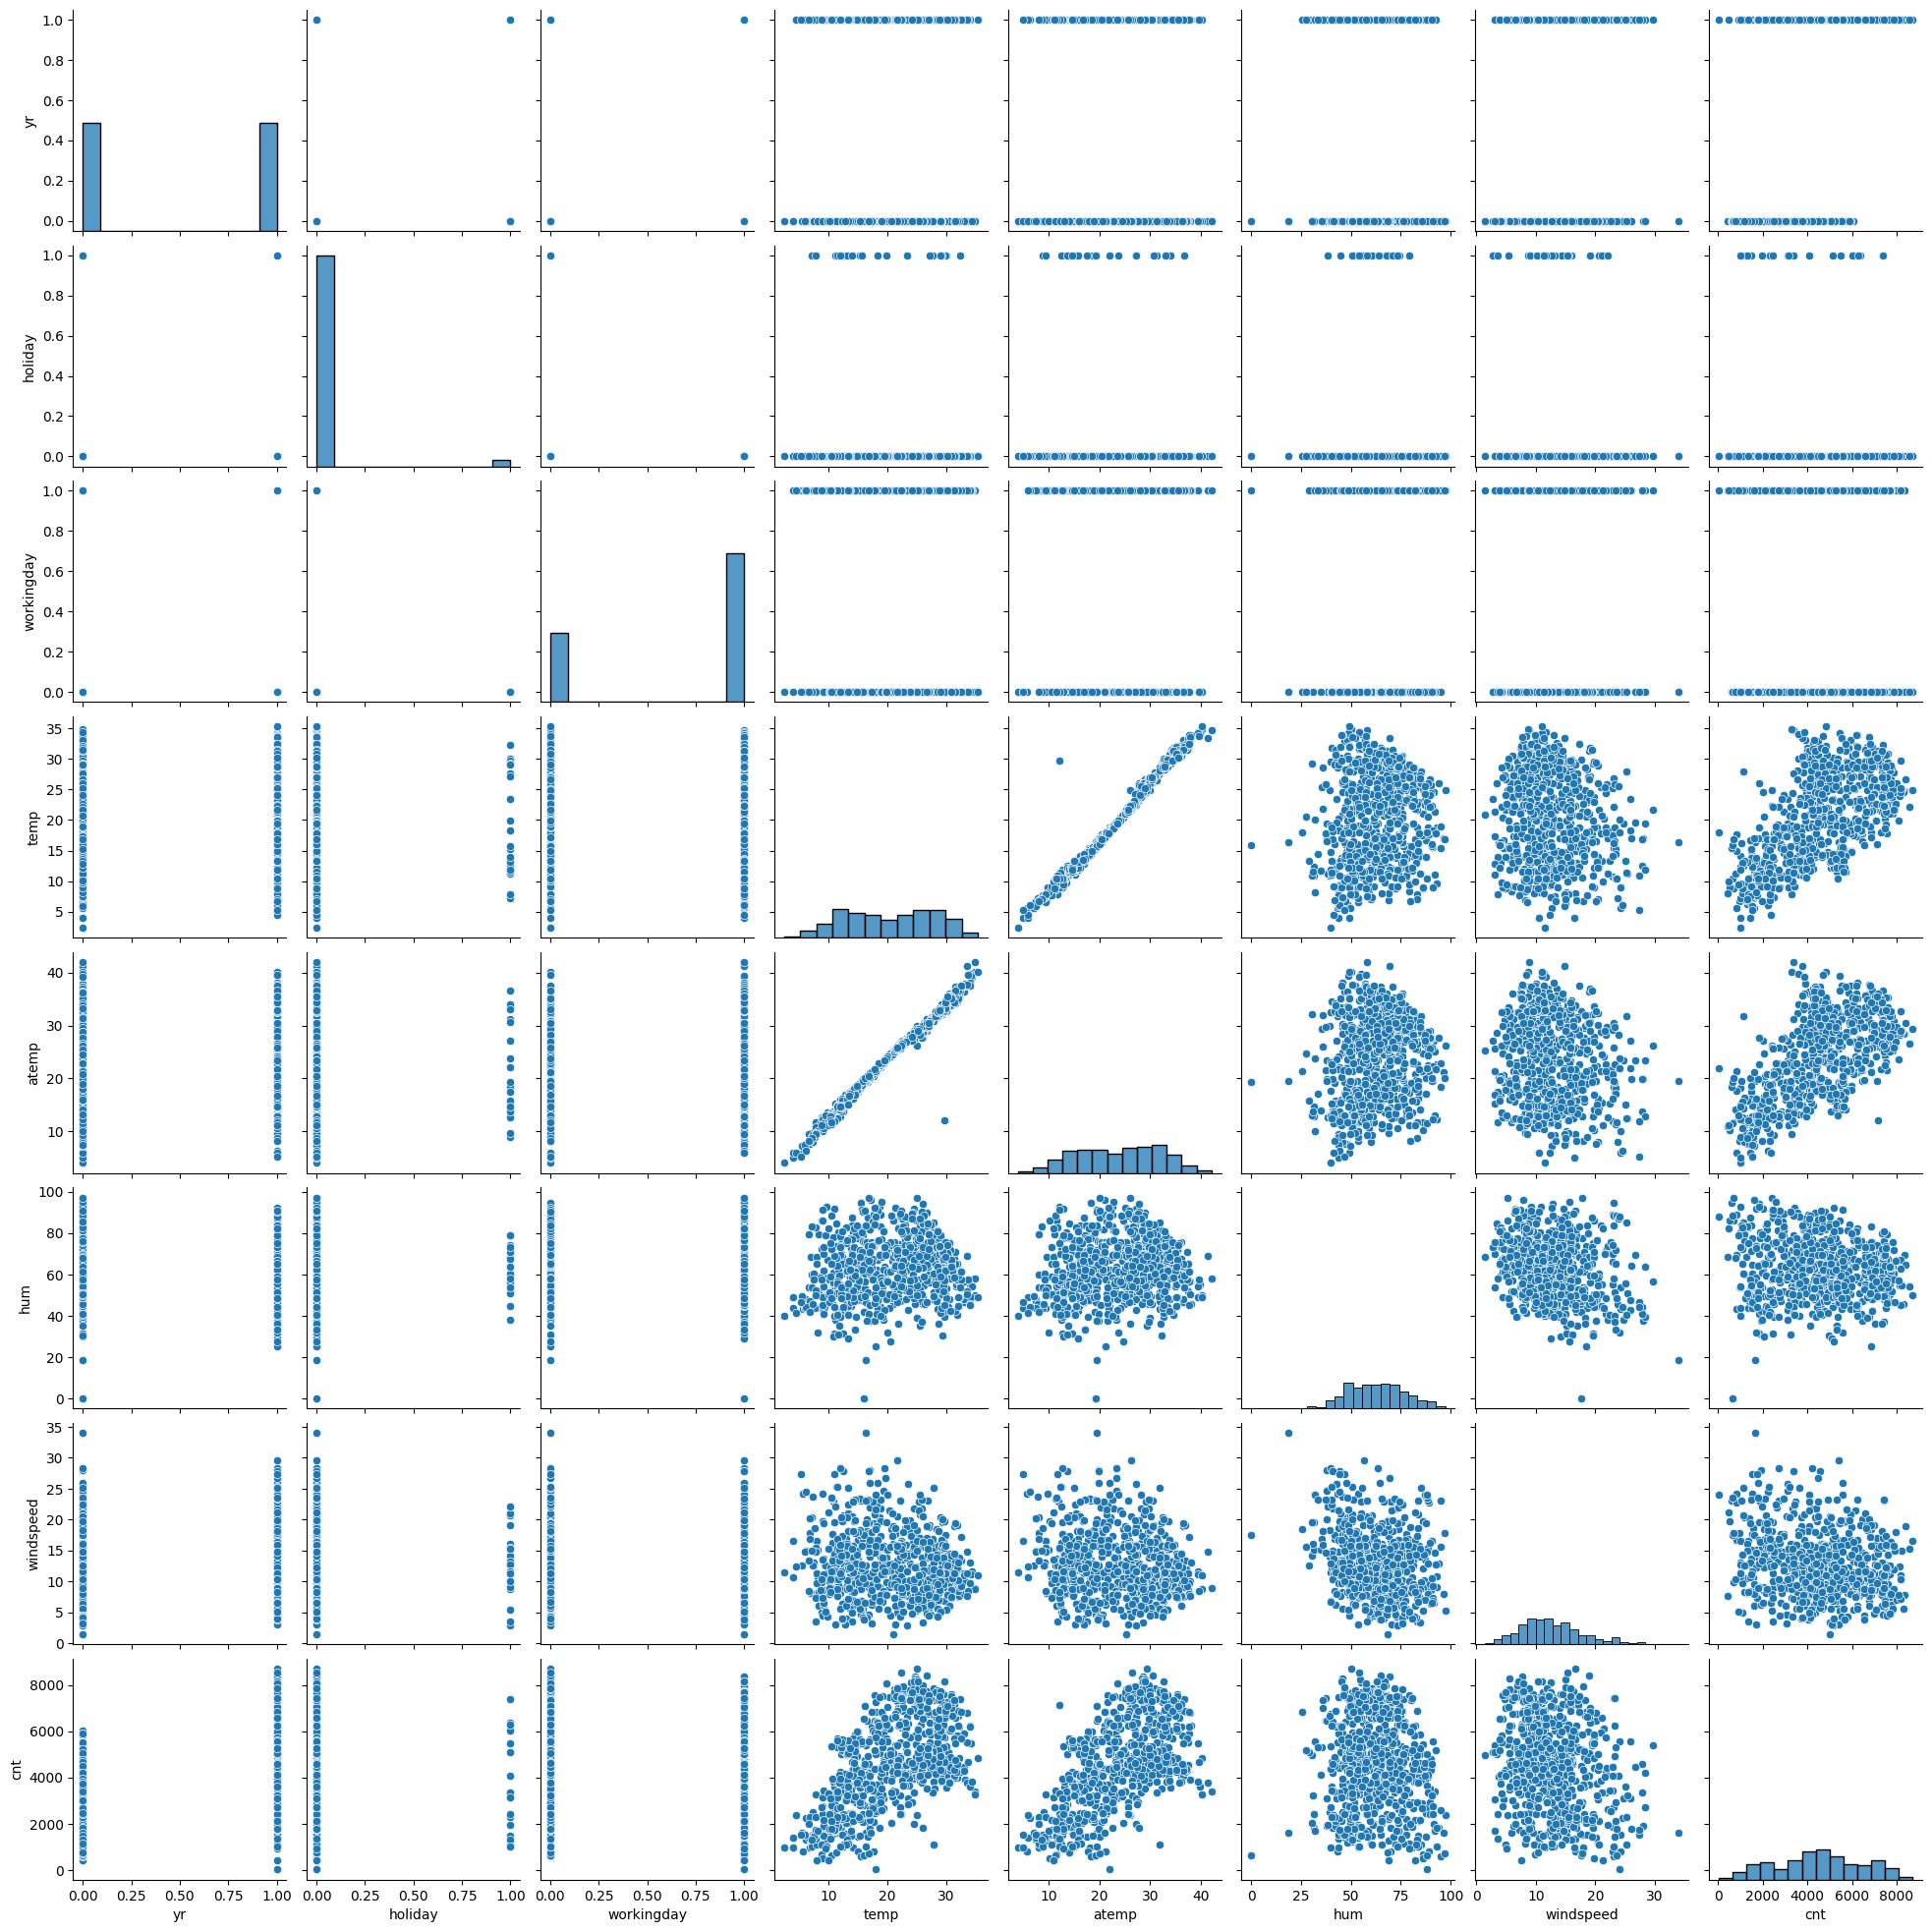

In [ ]:
#Pairplot to check if any linear regerssion relation exists between the variables
sns.pairplot(df1)

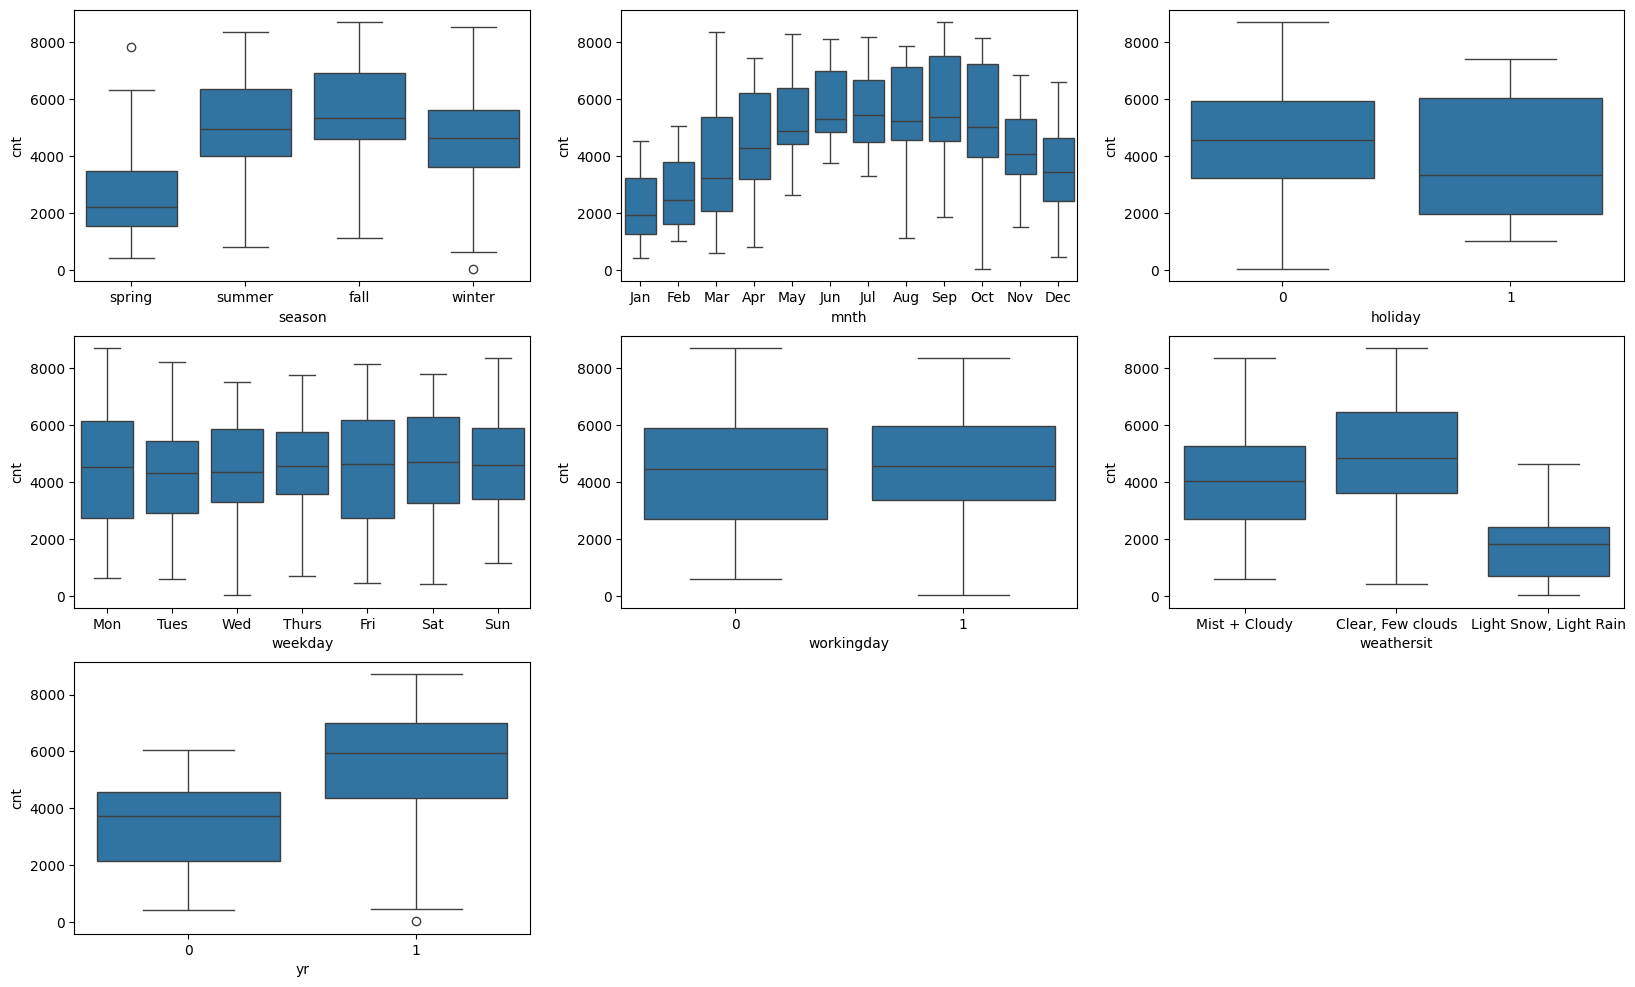

In [ ]:
#visualising the categorial variables
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=df1)
plt.subplot(3,3,2)
sns.boxplot(x='mnth', y='cnt', data=df1)
plt.subplot(3,3,3)
sns.boxplot(x='holiday', y='cnt', data=df1)
plt.subplot(3,3,4)
sns.boxplot(x='weekday', y='cnt', data=df1)
plt.subplot(3,3,5)
sns.boxplot(x='workingday', y='cnt', data=df1)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit', y='cnt', data=df1)
plt.subplot(3,3,7)
sns.boxplot(x='yr', y='cnt', data=df1)
plt.show()

In [ ]:

#backup
df1_after_EDA=df1

**Conclusions after Univariate analysis**
* Season influences the number of customers renting the bike and Fall has  maximum number of rents.
* July, Sep , June and Aug months has maximum  number of customers.
* On holidays we can see slight increase in number of bike renting.
* When the weather is clear bike is rented most.











# **Preparing the Data**

*   Binary variables
*  Othe categorical to dummy variables







In [ ]:
#check the columns for df1
#df1=df1_after_EDA
df1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

Creating Dummy variables for

1.   Season
2.   mnth
3.   weekday
4.  weathersit






In [ ]:
# get dummy variables for all the categorical varaibles with binary values
season_dummies = pd.get_dummies(df1['season'],drop_first=True ).astype(int)
mnth_dummies = pd.get_dummies(df1['mnth'],drop_first=True).astype(int)
weathersit_dummies = pd.get_dummies(df1['weathersit'],drop_first=True).astype(int)
weekday_dummies = pd.get_dummies(df1['weekday'],drop_first=True).astype(int)


In [ ]:
# Add the dummy variables to the dataframe
df1=pd.concat([df1, season_dummies, mnth_dummies, weekday_dummies,weathersit_dummies], axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,"Light Snow, Light Rain",Mist + Cloudy
0,spring,0,Jan,0,Mon,0,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tues,0,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,"Clear, Few clouds",8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thurs,1,"Clear, Few clouds",8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,"Clear, Few clouds",9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#drop the categorical variables to which we have created the dummy variables
df1=df1.drop(['season', 'mnth','weekday','weathersit'], axis=1)
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,"Light Snow, Light Rain",Mist + Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#backup of df1
df_back_after_data_prep=df1

# Split the data set to Training and Test set

In [ ]:
#df1=df_back_after_data_prep
df_train, df_test=train_test_split(df1, train_size=0.7, random_state=100)

In [ ]:
#check the shape of the Test and Train data set
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


Rescaling of numerical variables is required to common range/scale is achived.
Value of humidity, temp, cnt, windspeed, atemp need to be rescaled.

Using minmax scaling to rescale the values.It transforms numerical features to a specific range, between 0 and 1

In [ ]:
# Rescale the values

# Step : Create a scaler object
scaler = MinMaxScaler()

# Step 2: Fit the scaler on the training data and transform it
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']                          #variables which needs to be rescaled
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Step 3: Transform the test data using the same scaler
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,"Light Snow, Light Rain",Mist + Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
# check the rescaled values
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Train the model

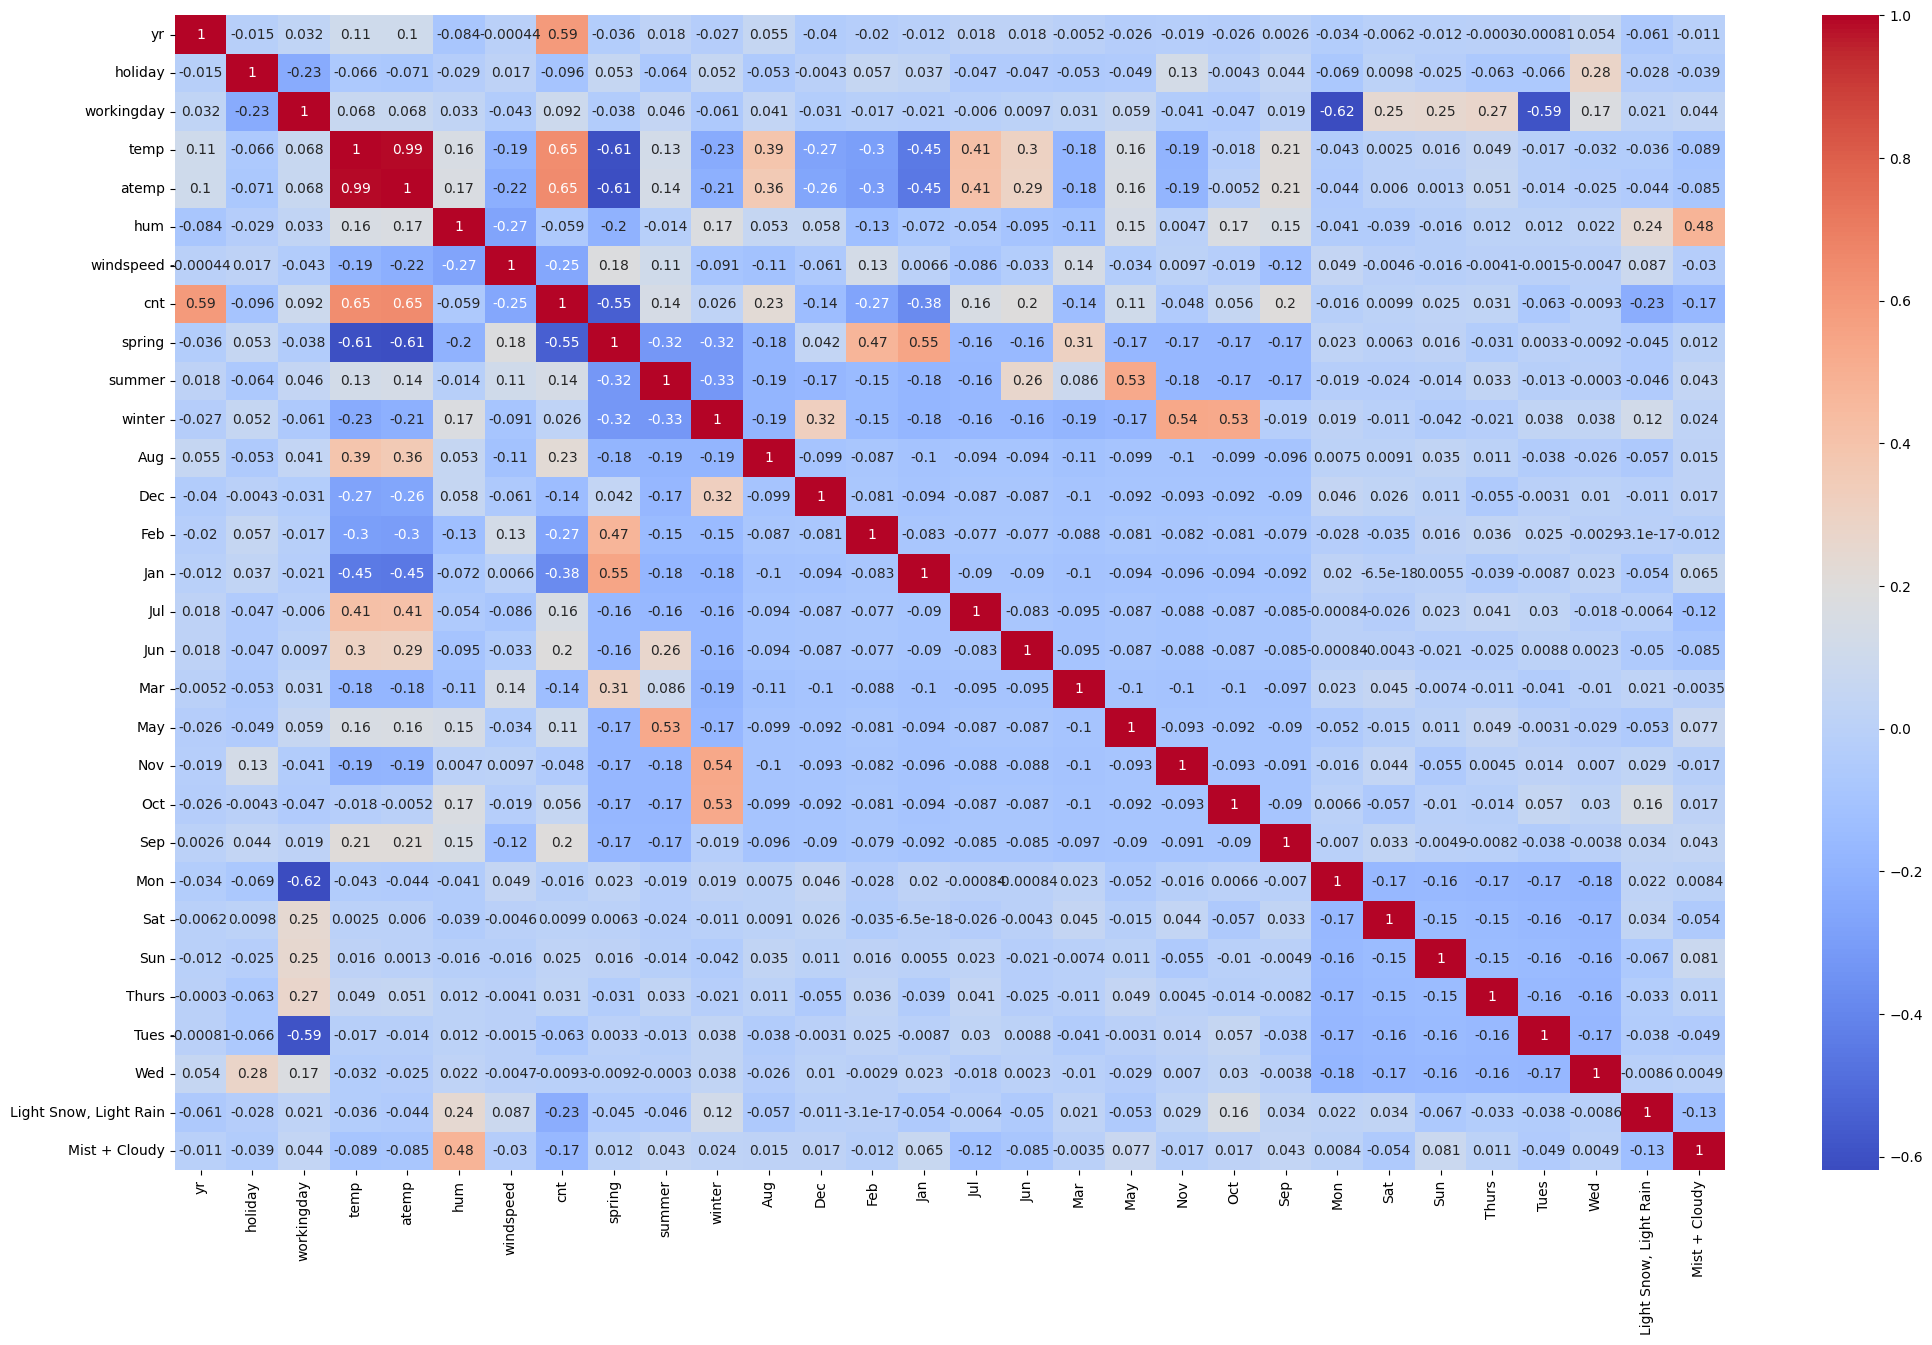

In [ ]:
# We can draft a heatmap to check the corealation matrix

plt.figure(figsize=(25,15))

# Exclude non-numeric columns from correlation calculation
numeric_df = df_train.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.show()

From the heatmap we can conclude the below :

1.   Temp and atemp is highly corelated with each other and there may exist
multicolinearity.
2. Months and Seasons are also showing correlation.
3. Humidity also has correlation wit the weather conditions.




In [ ]:
#Define the X_train, y_train variables where X_train takes the independent variable list and y_train is the dependent variable
y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
#verify the X_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,"Light Snow, Light Rain",Mist + Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
#verify y_train
y_train.head()

,cnt
576,0.827658
426,0.465255
728,0.204096
482,0.482973
111,0.191095


-**Getting the statistical significance of the varialbles**


In [ ]:
#fitting the model with all the possible variables

X_train_sm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_sm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          2.81e-180
Time:                        16:30:31   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
#checking VIF value for all the possible variables
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,workingday,86.77
3,temp,66.90
4,atemp,56.03
21,Mon,19.71
25,Tues,18.34
7,spring,10.77
9,winter,9.46
8,summer,8.29
18,Nov,6.79
10,Aug,6.47


Model has 28 independent variables and many having high VIF values as well. Using RFE (Recusrsive Feature Elimination) to select 15 most siginficant variables

In [ ]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select= 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
#listing the variables with the RFE ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 14),
 ('Sun', False, 11),
 ('Thurs', False, 10),
 ('Tues', False, 7),
 ('Wed', False, 9),
 ('Light Snow, Light Rain', True, 1),
 ('Mist + Cloudy', True, 1)]

In [ ]:
#List of variables selected through RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Mon',
       'Light Snow, Light Rain', 'Mist + Cloudy'],
      dtype='object')

In [ ]:
#List of variables eliminated by FE
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sat',
       'Sun', 'Thurs', 'Tues', 'Wed'],
      dtype='object')

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
#adding constant
X_train_sm = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          4.22e-191
Time:                        16:38:54   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
#calculate the VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
14,Mist + Cloudy,2.29
0,yr,2.09
12,Mon,1.98


In [ ]:
#removing hum due to high VIF
X=X_train_rfe.drop(['hum'], axis=1)
X_train_sm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_sm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.60e-188
Time:                        16:39:18   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
# re calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,spring,3.07
6,summer,2.34
0,yr,2.08
7,winter,1.98
11,Mon,1.97
8,Jan,1.62
9,Jul,1.59


In [ ]:
#removing workingday due to high VIF
X=X_train_rfe.drop(['workingday','hum'], axis=1)
X_train_sm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_sm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          2.48e-186
Time:                        16:39:49   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
#re calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,5.16
3,windspeed,4.64
4,spring,2.76
5,summer,2.24
0,yr,2.07
6,winter,1.80
7,Jan,1.61
8,Jul,1.59
12,Mist + Cloudy,1.56
9,Sep,1.34


In [ ]:
#removing Mon based on high p-value
X=X_train_rfe.drop(['workingday','hum','Mon'], axis=1)
X_train_sm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_sm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          8.14e-187
Time:                        16:40:34   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
#re calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,yr,2.07
6,winter,1.78
7,Jan,1.61
8,Jul,1.59
11,Mist + Cloudy,1.56
9,Sep,1.34


In [ ]:
#removing windspeed
X=X_train_rfe.drop(['workingday','hum','Mon','windspeed'], axis=1)
X_train_sm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_sm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          3.83e-180
Time:                        16:40:54   Log-Likelihood:                 482.52
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     498   BIC:                            -890.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
#calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.28
0,yr,2.07
3,spring,1.99
4,summer,1.94
6,Jan,1.60
7,Jul,1.59
5,winter,1.57
10,Mist + Cloudy,1.56
8,Sep,1.34
9,"Light Snow, Light Rain",1.07


We will settle with the above model as it has acceptable VIF (<5) and acceptable p-values(<0.05)

In [ ]:
#Below are the regression coeficiants provided by the model
print(lr_5.params.sort_values(ascending=False))

temp                      0.491416
yr                        0.233017
const                     0.158636
Sep                       0.081030
winter                    0.079091
summer                    0.034410
Jan                      -0.024026
Jul                      -0.051272
spring                   -0.073432
Mist + Cloudy            -0.077849
holiday                  -0.099899
Light Snow, Light Rain   -0.300152
dtype: float64


Residual Analysis : to verify the model

<ipython-input-59-4a83d363bc1f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


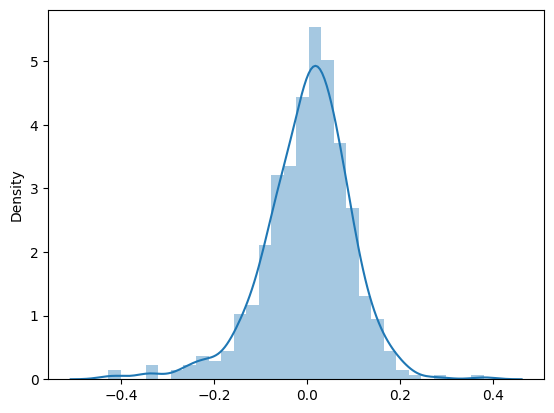

In [ ]:
y_train_pred = lr_5.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

Residual plot shows the normality.

Predictions and evaluations on the test set

In [ ]:
# We need to transform the test data using the same scaler which is already done in earlier steps


In [ ]:
#define the test data sets
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
col=X.columns
col

Index(['yr', 'holiday', 'temp', 'spring', 'summer', 'winter', 'Jan', 'Jul',
       'Sep', 'Light Snow, Light Rain', 'Mist + Cloudy'],
      dtype='object')

In [ ]:
X_test_sm=X_test[col]
X_test_sm.head()


,yr,holiday,temp,spring,summer,winter,Jan,Jul,Sep,"Light Snow, Light Rain",Mist + Cloudy
184,0,1,0.831783,0,0,0,0,1,0,0,1
535,1,0,0.901354,0,1,0,0,0,0,0,0
299,0,0,0.511964,0,0,1,0,0,0,0,1
221,0,0,0.881625,0,0,0,0,0,0,0,0
152,0,0,0.817246,0,1,0,0,0,0,0,0


In [ ]:
#add constant to x_test
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,holiday,temp,spring,summer,winter,Jan,Jul,Sep,"Light Snow, Light Rain",Mist + Cloudy
184,1.0,0,1,0.831783,0,0,0,0,1,0,0,1
535,1.0,1,0,0.901354,0,1,0,0,0,0,0,0
299,1.0,0,0,0.511964,0,0,1,0,0,0,0,1
221,1.0,0,0,0.881625,0,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0,1,0,0,0,0,0,0


In [ ]:
X_test_sm.shape


(220, 12)

In [ ]:
#predict
y_pred = lr_5.predict(X_test_sm)

In [ ]:
#evaluate the model

r2_score(y_true=y_test,y_pred=y_pred)


0.8091717167735306

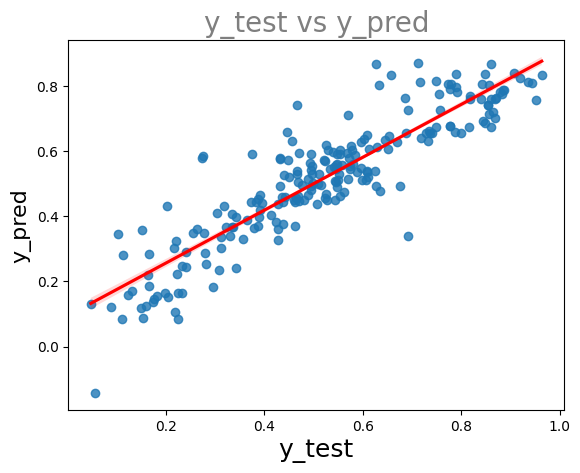

In [ ]:
#plotting the y_test and y_pred
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20, alpha=0.5)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [ ]:
# get r2 squared for predicated model

r2 = r2_score(y_test, y_pred)

print("R-squared (R2):", r2)


R-squared (R2): 0.8091717167735306


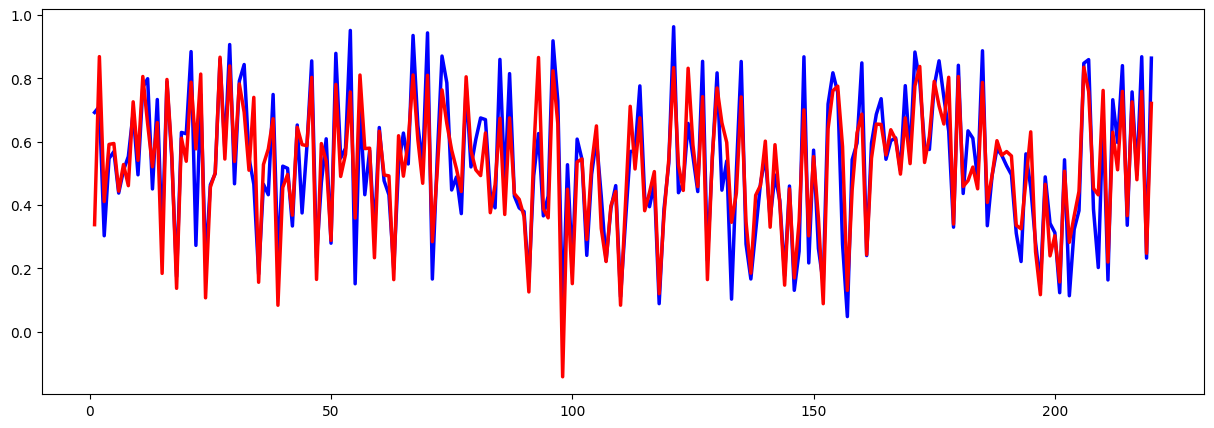

In [ ]:
# line plot actual vs predicated values

c=[i for i in range (1,len(y_test) + 1,1)] # generate a list 'c' with the same number of elements as y2_test
fig=plt.figure(figsize=(15,5) )
plt.plot(c, y_test, color='blue', label='Actual', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred, color='red', label='Predicted',linewidth=2.5, linestyle='-')
plt.show()

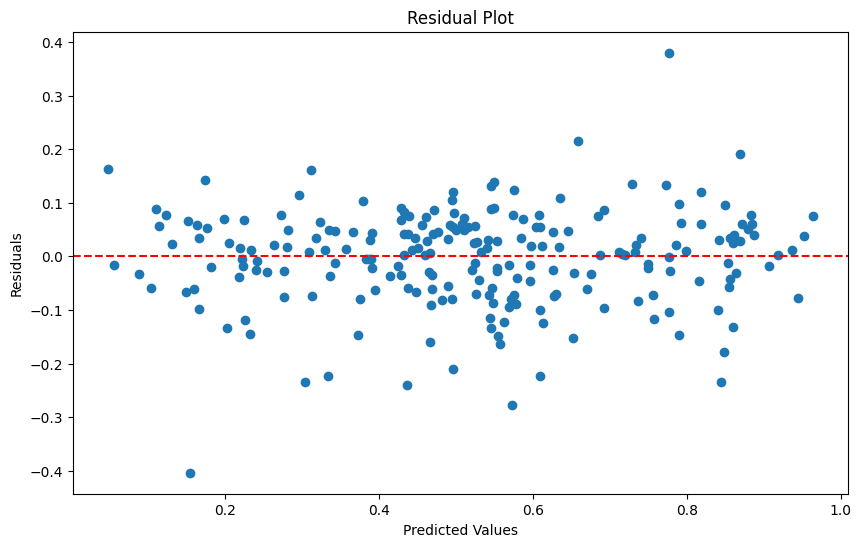

In [ ]:
# Residual Plots
plt.figure(figsize=(10, 6))
plt.scatter(y_test, res[:len(y_test)])  # Use y_test for x-axis and slice res to match length of y_test
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
